In [2]:
!pip install rasterio scikit-image matplotlib numpy


In [8]:
!wget https://download.osgeo.org/geotiff/samples/gdal_eg/cea.tif -O Delhi.tif


--2025-08-24 09:31:54--  https://download.osgeo.org/geotiff/samples/gdal_eg/cea.tif
Resolving download.osgeo.org (download.osgeo.org)... 140.211.15.30
Connecting to download.osgeo.org (download.osgeo.org)|140.211.15.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270993 (265K) [image/tiff]
Saving to: ‘Delhi.tif’

Delhi.tif           100%[===================>] 264.64K  1.07MB/s    in 0.2s    

2025-08-24 09:31:55 (1.07 MB/s) - ‘Delhi.tif’ saved [270993/270993]



In [18]:
import rasterio
import numpy as np
from skimage.segmentation import slic
import matplotlib.pyplot as plt

# Load GeoTIFF
image_path = "Delhi.tif"   # replace with your file path
with rasterio.open(image_path) as src:
    image = src.read()
    pixel_size = src.res[0]   # pixel size in meters

# Reshape image for segmentation
image_reshaped = np.moveaxis(image, 0, -1)





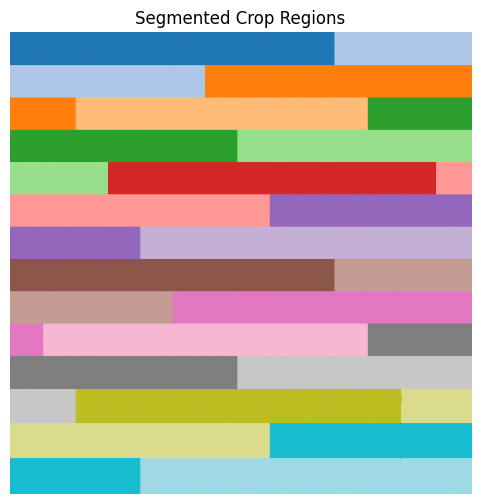

In [15]:
segments = slic(image_reshaped, n_segments=200, compactness=10, start_label=1)

plt.figure(figsize=(8,6))
plt.imshow(segments, cmap="tab20")
plt.title("Segmented Crop Regions")
plt.axis("off")
plt.show()


In [16]:
# Count pixels in each segment
unique_segments, counts = np.unique(segments, return_counts=True)

# Convert pixel counts → area (in hectares)
segment_areas = counts * (pixel_size**2) / 10000

# Show sample results
for seg, area in zip(unique_segments[:10], segment_areas[:10]):
    print(f"Crop Segment {seg} → {area:.2f} hectares")


Crop Segment 1 → 493.20 hectares
Crop Segment 2 → 479.87 hectares
Crop Segment 3 → 479.87 hectares
Crop Segment 4 → 479.87 hectares
Crop Segment 5 → 479.87 hectares
Crop Segment 6 → 479.87 hectares
Crop Segment 7 → 479.87 hectares
Crop Segment 8 → 479.87 hectares
Crop Segment 9 → 479.87 hectares
Crop Segment 10 → 479.87 hectares


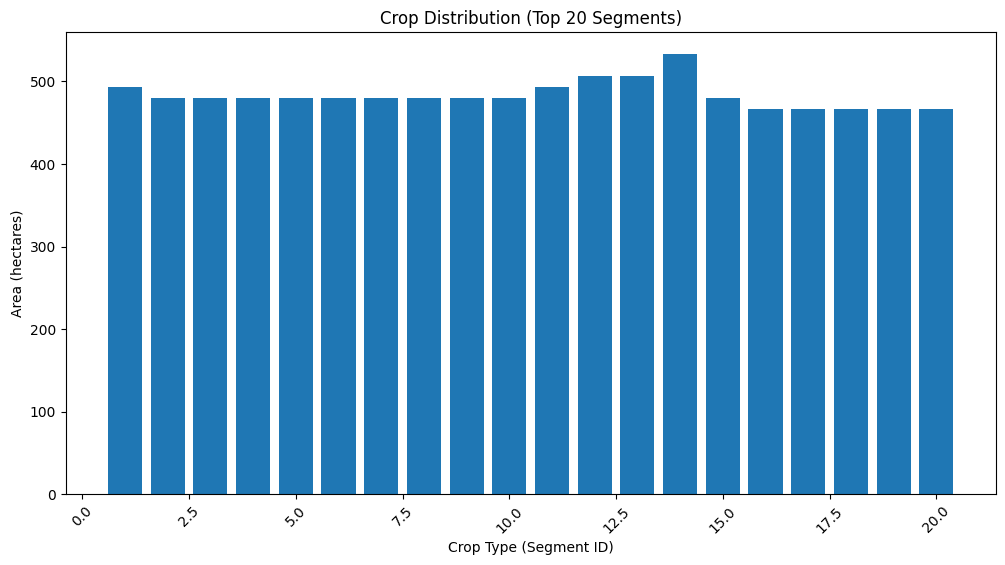

In [17]:
plt.figure(figsize=(12,6))
plt.bar(unique_segments[:20], segment_areas[:20])
plt.xlabel("Crop Type (Segment ID)")
plt.ylabel("Area (hectares)")
plt.title("Crop Distribution (Top 20 Segments)")
plt.xticks(rotation=45)
plt.show()
